# EDA

- Word cloud of each senator
- Number of bills per senator
- Number of bills throughout time (per senator, per topic)

In [9]:
import pandas as pd
import json
import bs4
import re
from tqdm.notebook import tqdm
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dataset = pd.read_csv('clusters_added_rev1.csv')
#clusters_added
#dataset = pd.read_pickle("bills.pkl")
print(dataset.shape)
dataset.head(2)


(15640, 14)


congress  bill_num                                           title  \
0        13         1  SPECIAL MEASURES TO LOWER THE COST OF MEDICINE   
1        13         2               THE CONSTITUTIONAL CONVENTION ACT   

                                          long_title   filed_on  \
0  AN ACT PRESCRIBING SPECIAL  MEASURES  TO LOWER...  6/30/2004   
1  AN ACT CALLING FOR A  CONSTITUTIONAL CONVENTIO...  6/30/2004   

                                         filed_by introduced_by  \
0  ['Flavier, Juan M', ', Angara, Edgardo J', '']   ['FLAVIER']   
1                         ['Flavier, Juan M', '']   ['FLAVIER']   

                                   primary_committee     scope  \
0                              Health and Demography  National   
1  Constitutional Amendments, Revision of Codes a...  National   

                                      combined_title  clustering_0  \
0  special measure lower cost medicine act prescr...             1   
1  constitutional convention act act calling cons...             1   

   clustering_1  clustering_2    clean_filed_by  
0             0           772  Flavier_ Juan M   
1             0          1724  Flavier_ Juan M

In [12]:
# check the null values
dataset.isnull().mean()

congress             0.000000
bill_num             0.000000
title                0.000000
long_title           0.031841
filed_on             0.000000
filed_by             0.000000
introduced_by        0.000000
primary_committee    0.056394
scope                0.031841
combined_title       0.000000
clustering_0         0.000000
clustering_1         0.000000
clustering_2         0.000000
clean_filed_by       0.000000
dtype: float64

In [13]:
# Identify the type of ditribution and 
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15640 entries, 0 to 15639
Data columns (total 14 columns):
congress             15640 non-null int64
bill_num             15640 non-null int64
title                15640 non-null object
long_title           15142 non-null object
filed_on             15640 non-null object
filed_by             15640 non-null object
introduced_by        15640 non-null object
primary_committee    14758 non-null object
scope                15142 non-null object
combined_title       15640 non-null object
clustering_0         15640 non-null int64
clustering_1         15640 non-null int64
clustering_2         15640 non-null int64
clean_filed_by       15640 non-null object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


congress      bill_num  clustering_0  clustering_1  clustering_2
count  15640.000000  1.564000e+04  15640.000000  15640.000000  15640.000000
mean      15.275192  4.441737e+03      0.937020      0.567711   1770.060422
std        1.600874  2.433423e+05      0.405298      1.467692   1128.288542
min       13.000000  1.000000e+00      0.000000      0.000000      0.000000
25%       14.000000  6.540000e+02      1.000000      0.000000    789.000000
50%       15.000000  1.306000e+03      1.000000      0.000000   1646.000000
75%       17.000000  2.005000e+03      1.000000      0.000000   2712.000000
max       18.000000  2.209201e+07      3.000000      7.000000   4059.000000

## Creating a Word Cloud

In [24]:
# list of unique senator name convention .. Manually do in excel
df_sen = pd.read_csv('sen_code_uni.csv')
print(df_sen.shape)
df_sen.head(2)


(49, 1)


Sen_name
0  Angara_ Edgardo 
1     Angara_ Sonny

In [27]:
# list of unique senator name convention .. Manually do in excel
list_sen = df_sen['Sen_name'].tolist()
len(list_sen)

49

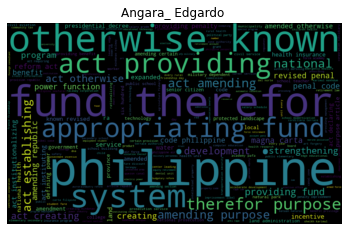

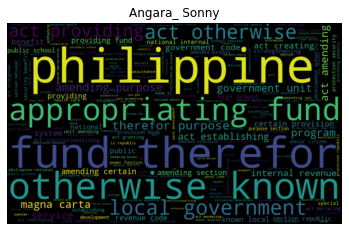

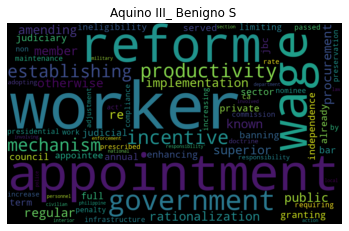

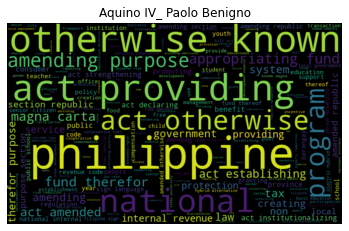

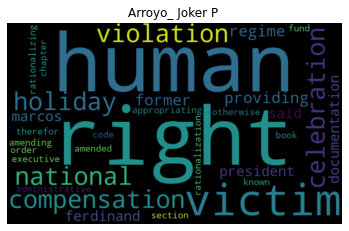

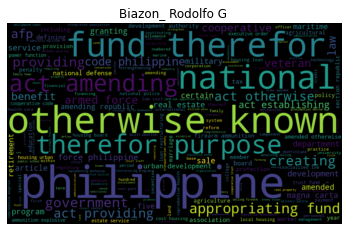

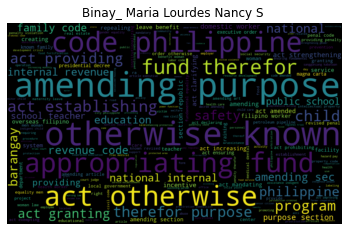

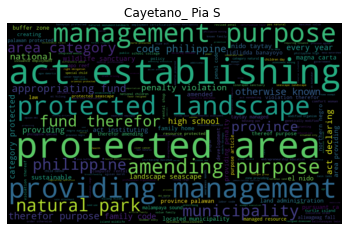

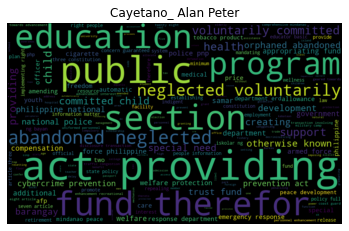

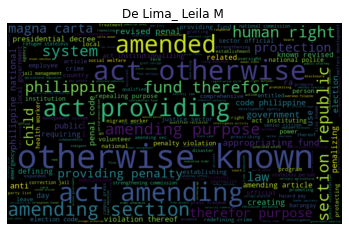

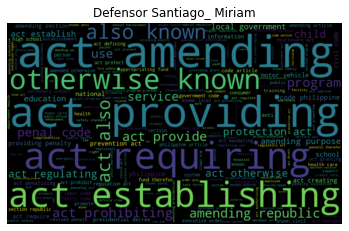

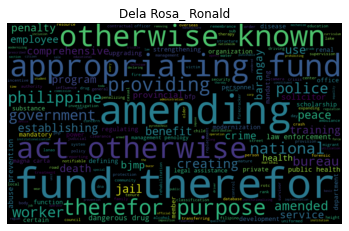

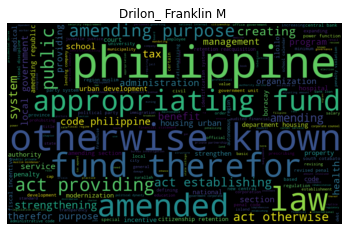

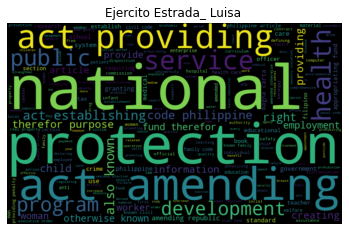

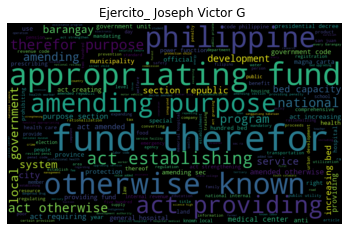

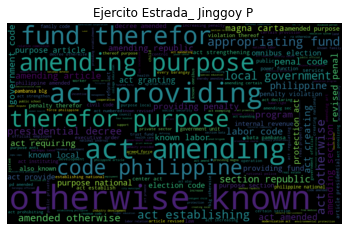

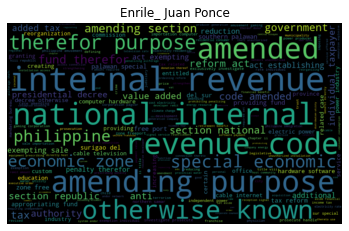

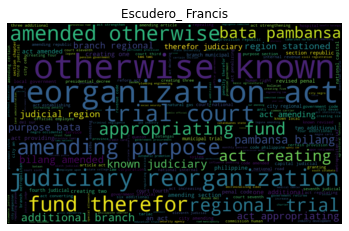

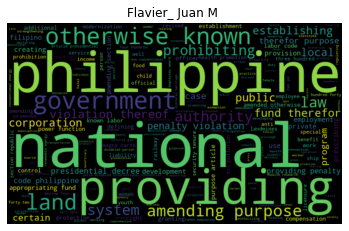

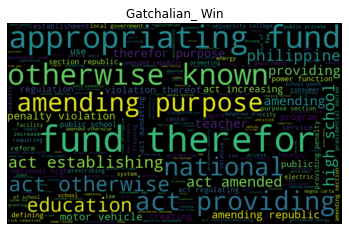

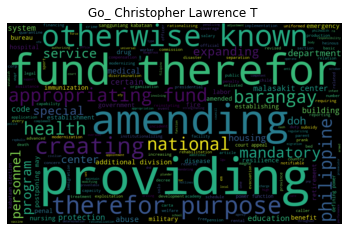

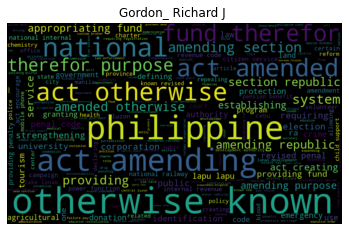

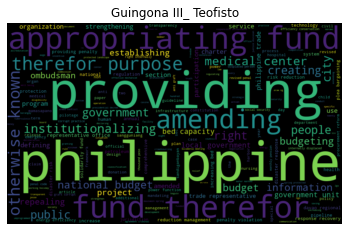

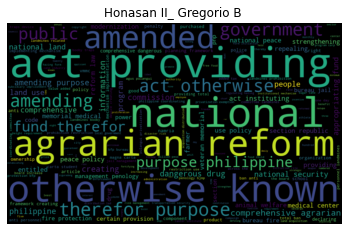

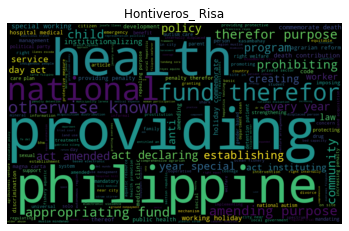

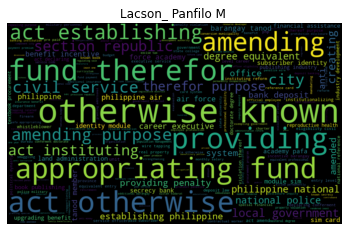

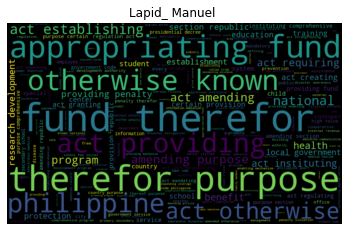

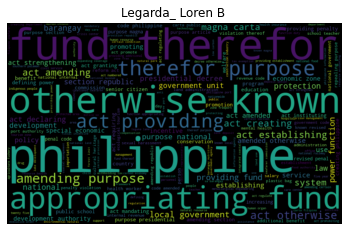

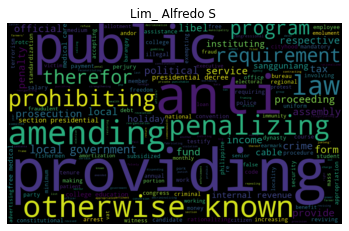

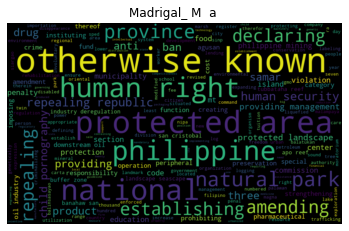

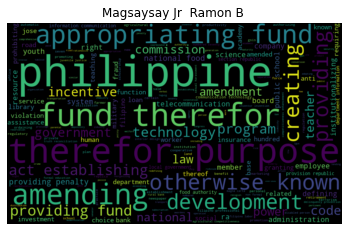

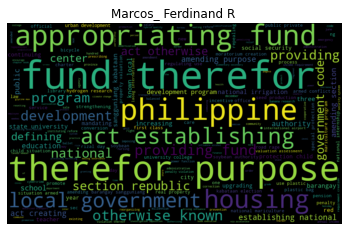

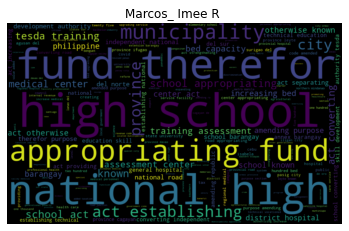

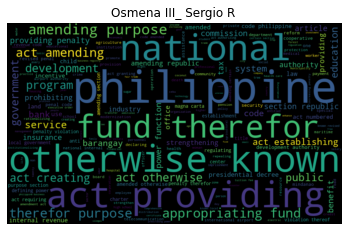

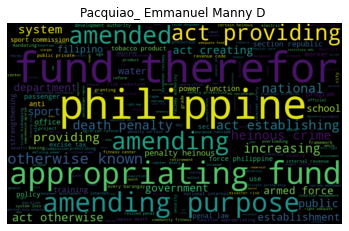

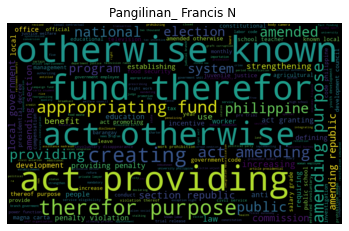

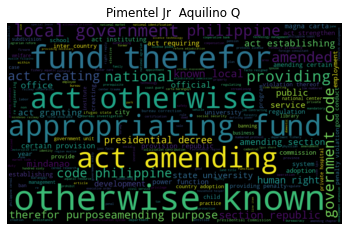

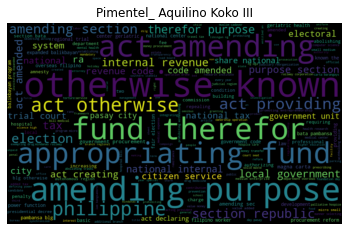

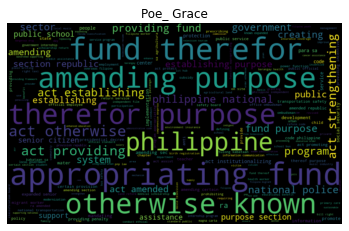

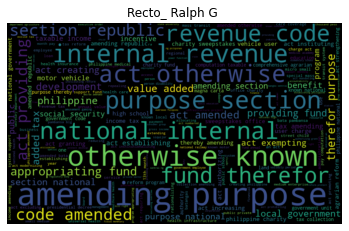

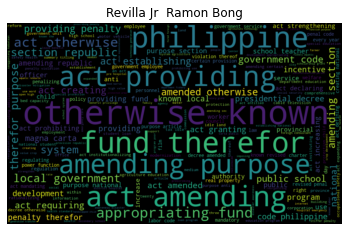

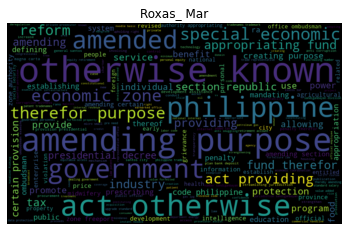

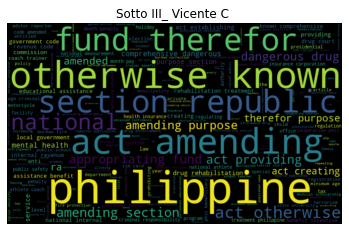

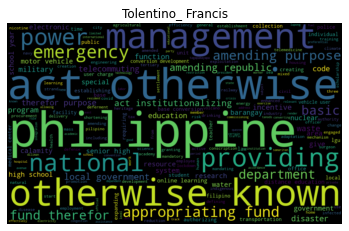

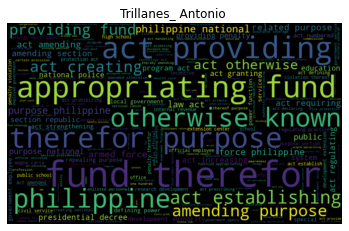

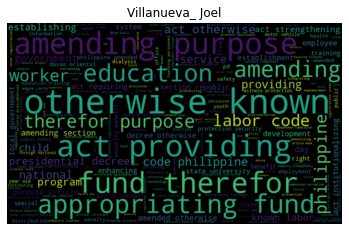

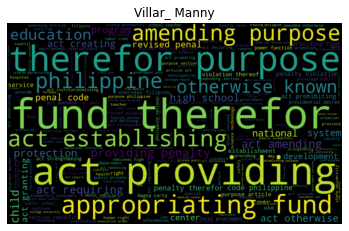

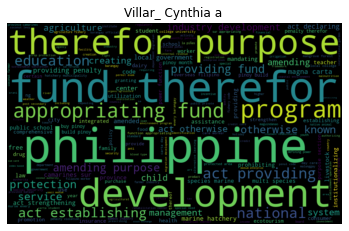

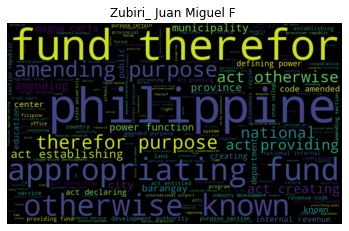

In [32]:
stop_words = ["ACT", "act", "republic", "purpose"]
for ss in list_sen:
    wc = WordCloud(stopwords = stop_words, width=1000, height=600).generate(' '.join(dataset[dataset['clean_filed_by'].str.contains(ss)]['combined_title']))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(ss)
    plt.show()

## Bar Plot per Senator

In [33]:

dataset.head(2)



congress  bill_num                                           title  \
0        13         1  SPECIAL MEASURES TO LOWER THE COST OF MEDICINE   
1        13         2               THE CONSTITUTIONAL CONVENTION ACT   

                                          long_title   filed_on  \
0  AN ACT PRESCRIBING SPECIAL  MEASURES  TO LOWER...  6/30/2004   
1  AN ACT CALLING FOR A  CONSTITUTIONAL CONVENTIO...  6/30/2004   

                                         filed_by introduced_by  \
0  ['Flavier, Juan M', ', Angara, Edgardo J', '']   ['FLAVIER']   
1                         ['Flavier, Juan M', '']   ['FLAVIER']   

                                   primary_committee     scope  \
0                              Health and Demography  National   
1  Constitutional Amendments, Revision of Codes a...  National   

                                      combined_title  clustering_0  \
0  special measure lower cost medicine act prescr...             1   
1  constitutional convention act act calling cons...             1   

   clustering_1  clustering_2    clean_filed_by  
0             0           772  Flavier_ Juan M   
1             0          1724  Flavier_ Juan M

<AxesSubplot:xlabel='count', ylabel='clean_filed_by'>

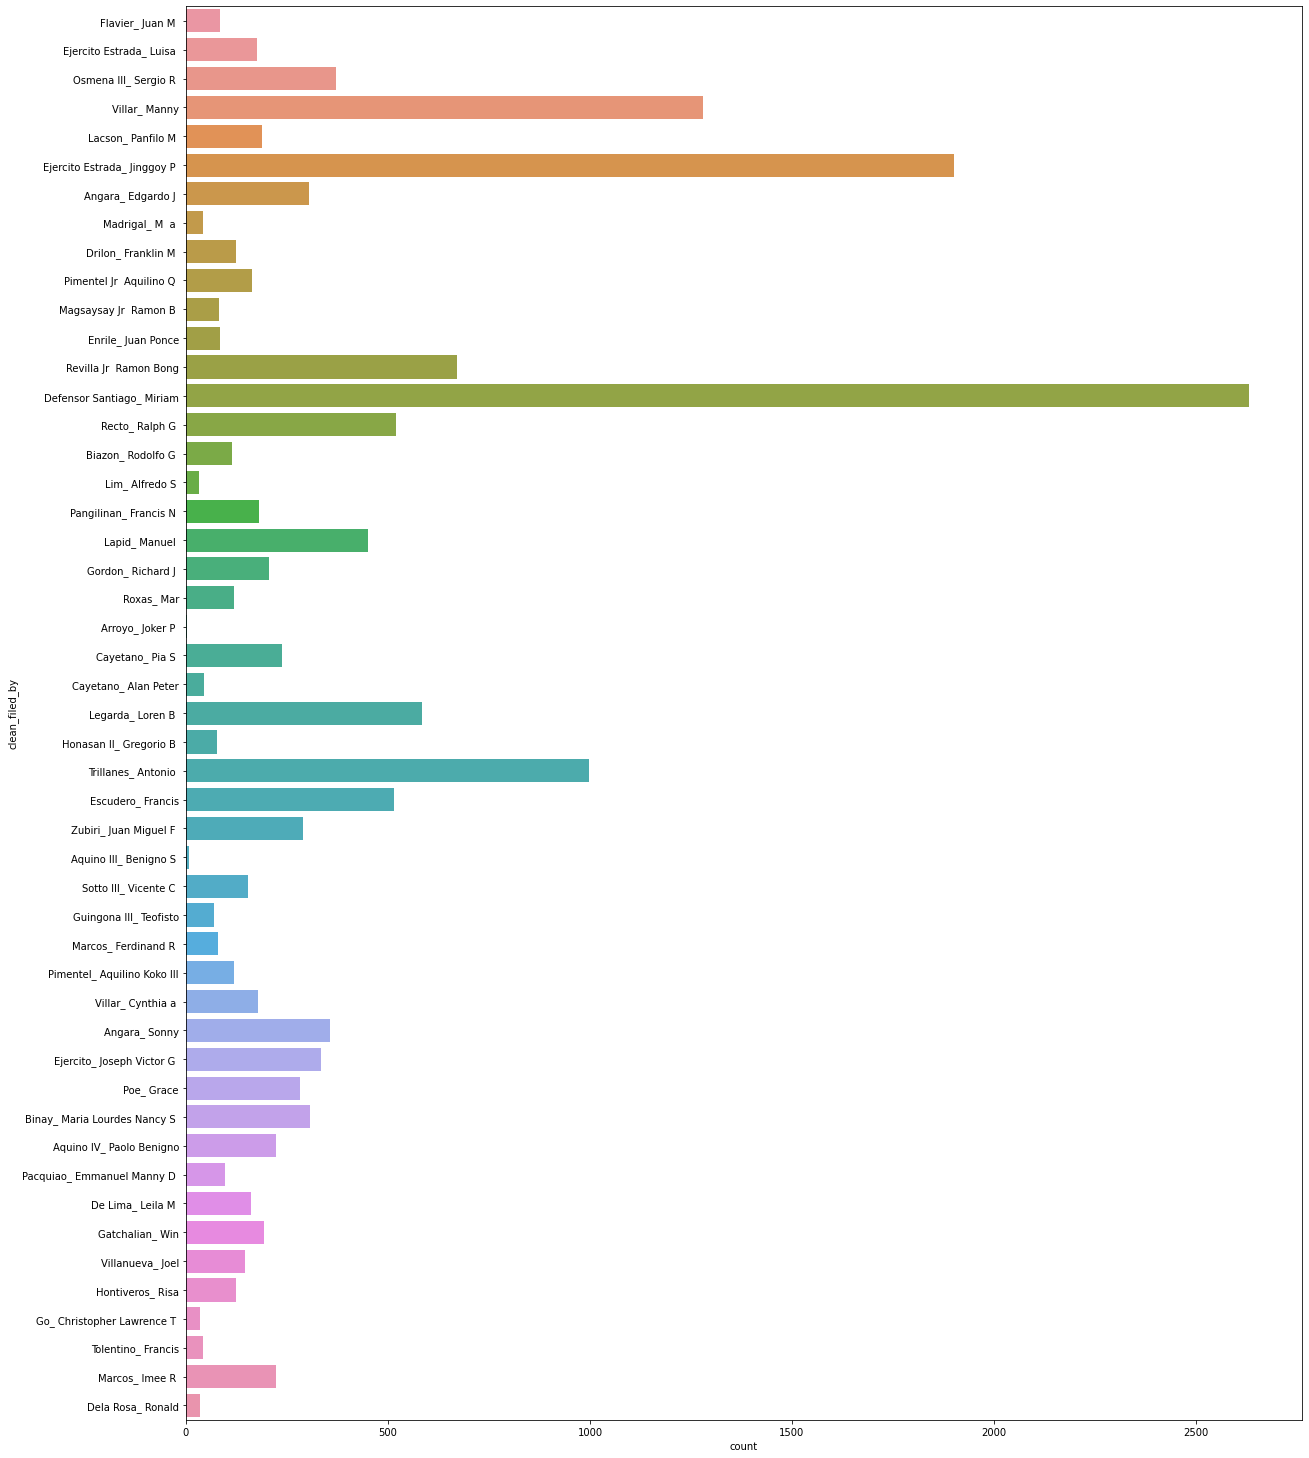

In [34]:
plt.figure(figsize=(20, 26))
sns.countplot(y='clean_filed_by', data=dataset)


<AxesSubplot:xlabel='count', ylabel='primary_committee'>

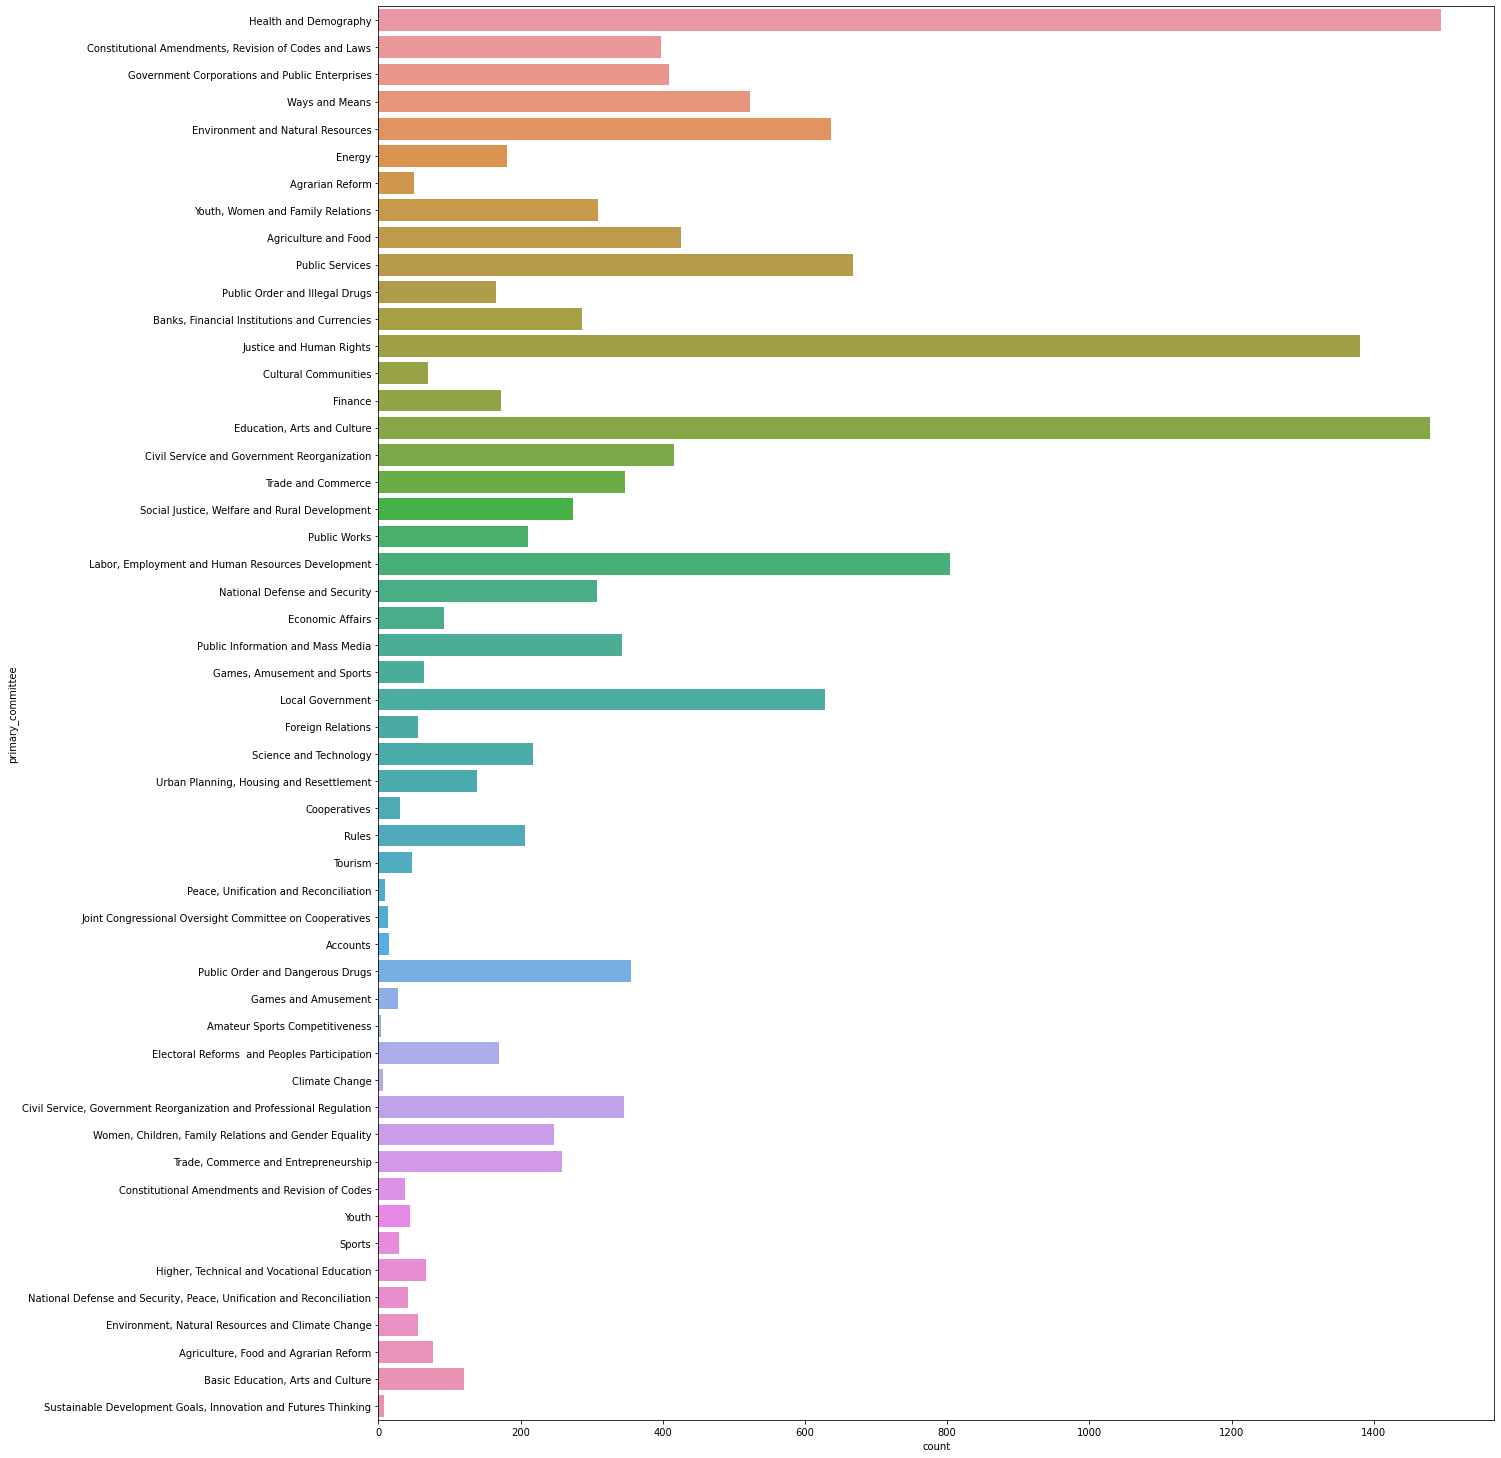

In [36]:
plt.figure(figsize=(20, 26))
sns.countplot(y='primary_committee', data=dataset)
